## Final Coding Challenge: Mohr's Circle Project  
### **Noah Helm**

The purpose of this project was to create a tool that can output the Mohr's Circle and accompanying values (i.e. Max Shear, Principle Stresses, Center, and Radius) given an x and y normal stress values and the shear stress. It will also output the stress invariants, effective stressor mises stress, and hydrostatic stress.

### **Original Attempt using matplotlib**

This first attempt at creating Mohr's circle does all of the basic calculations, and outputs the circle using matplot lib with the key points on the circle. It is missing some of the information such as stress invariants, effective stressor mises stress, and hydrostatic stress.

In [0]:
from matplotlib import pyplot as plt
import numpy as np

Normal Stress in x-direction: 4
Normal Stress in y-direction: -5
Shear Stress: 6


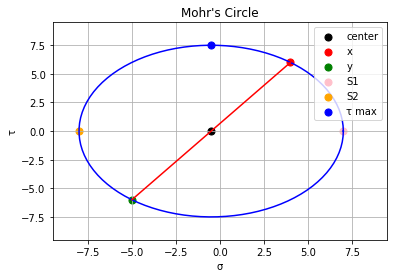

In [5]:
import math
from math import pi

#Get input for shear stress (T), x, y
x = int(input("Normal Stress in x-direction: "))
y = int(input("Normal Stress in y-direction: "))
T = int(input("Shear Stress: "));

#Calculate center of circle, c
c = (x+y)/2

#Calculate radius of circle, r
r = math.sqrt(((x-y)/2)**2+T**2)

# Create some data
t = np.linspace(0,2*pi,100)
a = r*np.cos(t)+c #c is center of mohr's circle
b = r*np.sin(t)

# Plot the circle
#fig = plt.figure()
plt.plot(a, b, color='blue')

# Plot the line from the x point to the y point on the circle
u = np.linspace(x,y,100)
v = np.linspace(T,-T,100)
plt.plot(u, v, color='red')

#plot center point
plt.scatter(c,0,s=200,color='black', marker = '.',label='center')

#plot x stresses
plt.scatter(x,T,s=200,color='red', marker = '.',label='x')
#ax = fig.add_subplot(111)
#ax.text(x, -T, r'an equation: $E=mc^2$', fontsize=15)
#plt.annotate('x',xy=(x,-T))

#plot y stresses
plt.scatter(y,-T,s=200,color='green', marker = '.',label='y')

#calculate and plot principal stresses
s1 = c + r
s2 = c - r
plt.scatter(s1,0,s=200,color='pink', marker = '.',label='S1')
plt.scatter(s2,0,s=200,color='orange', marker = '.',label='S2')

#calculate and plot max shear stress
Tmax = r
plt.scatter(c,Tmax,s=200,color='blue', marker = '.',label='\u03C4 max')

#calculate the angle of max shear
theta_2 = np.arctan(-T/(x-c))
theta = (theta_2/2)*(180/pi)

# Annotate the plot
plt.xlabel('\u03C3')
plt.ylabel('\u03C4')
plt.title('Mohr\'s Circle')
plt.xlim([-r-2,r+2])
plt.ylim([-r-2,r+2])

# Turn on the grid
plt.grid()

# Turn on the legend
plt.legend()

# Show the plot
plt.show()

### Finding Principal Stresses Using Eigenvalues and Eigenvectors

Below I successfully found a way to find principal stresses and the direction using a stres-tensor matrix

In [6]:
from numpy import linalg as LA
#create stress-tensor matrix

M = np.array([[x,-T],[-T,y]])

#determine eigenvalues and eigenvectors
w,v = LA.eig(M)

#principal stresses
s1_eig = w[0]
s2_eig = w[1]

#direction
theta_eig = np.arctan((v[1,0])/(v[0,0]))*(180/pi)

print(s1,s2,theta, s1_eig,s2_eig,theta_eig)

7.0 -8.0 -26.56505117707799 7.0 -8.0 -26.56505117707799


### Finding stress invariants, effective stressor mises stress, and hydrostatic stress

In [0]:
s1 = w[0]
s2 = w[1]


# stress invariants

SI = np.poly((s1,s2)) #generates the coefficients of a polynomial with the given roots

# von Mises stress
# Source: http://web.mae.ufl.edu/nkim/eas4200c/VonMisesCriterion.pdf

ms = 0.5*math.sqrt(2*(s1**2-s1*s2+s2**2))

# hydrostatic stress

hs = 0.5*(s1 + s2)



### Second attempt using plotly offline

I attempted the Mohr's Circle program a second time using plotly so that I could use its mouseover capabilities to display the coordinates of each point of the graph and the labels without using a legend. I also incorporated the use of eigenvectors and values for finding the principal stresses into this iteration of the program. The only issue I encountered with plotly was that I was unable to get the axis titles and graph title to display.

In [0]:
import plotly.offline as py
import plotly.graph_objs as go

py.init_notebook_mode(connected=True)

In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [0]:
import numpy as np
import math
from math import pi

#Get input for shear stress (T), x, y
x = 4
y = -5
T = 6
#x = int(input("Normal Stress in x-direction: "))
#y = int(input("Normal Stress in y-direction: "))
#T = int(input("Shear Stress: "));

#Calculate center of circle, c
c = (x+y)/2

#Calculate radius of circle, r
r = math.sqrt(((x-y)/2)**2+T**2)

# Create arrays for circle datapoints
t = np.linspace(0,2*pi,1000)
a = r*np.cos(t)+c #c is center of mohr's circle
b = r*np.sin(t)

#calculate and plot principal stresses
from numpy import linalg as LA
#create stress-tensor matrix

M = np.array([[x,-T],[-T,y]])

#determine eigenvalues and eigenvectors
w,v = LA.eig(M)

#principal stresses
s1 = w[0]
s2 = w[1]

#direction
theta_eig = np.arctan((v[1,0])/(v[0,0]))*(180/pi)

# stress invariants

SI = np.poly((s1,s2)) #generates the coefficients of a polynomial with the given roots

# von Mises stress
# Source: http://web.mae.ufl.edu/nkim/eas4200c/VonMisesCriterion.pdf

ms = 0.5*math.sqrt(2*(s1**2-s1*s2+s2**2))

# hydrostatic stress

hs = s1 + s2


configure_plotly_browser_state() #call function from above

trace1 = go.Scatter(
        x = a,
        y = b,
        hoverinfo = 'none',
        showlegend = False
    )

#Text labels for all points
trace2 = go.Scatter(
        x = [x, y,c,s1,s2],
        y = [T,-T,0,0,0],
        mode = 'markers',
        text = ["\u03C3, \u03C4 on X Face", "\u03C3, \u03C4 on Y Face","Center","Principal Stress 1","Principal Stress 2"],
        hoverinfo = 'text',
        marker = dict(
            color = 'red'
        ),
        showlegend = False    
    )
#Number labels for initial x and y coordinates
trace3 = go.Scatter(
        x = [x, y],
        y = [T,-T],
        hoverinfo = ['x','y'],
        marker = dict(
            color = 'red'
        ),
        showlegend = False
    )

#Number labels for principal stresses, center, and maximum shear
trace4 = go.Scatter(
        x = [c,s1,s2],
        y = [0,0,0],
        mode = 'markers',
        hoverinfo = ['x','y'],
        marker = dict(
            color = 'red'
        ),
        showlegend = False
    )

data = [trace1, trace2, trace3, trace4]

# layout = go.Layout(
#     title = 'Mohr\'s Circle',
#     scene = dict(
#         xaxis = dict(title='x axis label'),
#         yaxis = dict(title='y axis label')
#     )
# )

fig = go.Figure(data=data)
py.iplot(fig, filename='mohrs_circle')

print("Mohr's Circle Data:\n",
       "Orientation of Principal Stress Element (degrees): ", theta_eig, "\n",
       "Stress Invariants: ", SI, "\n",
       "Hydrostatic Stress: ", hs, "\n",
       "von Mises Stress: ", ms)

Mohr's Circle Data:
 Orientation of Principal Stress Element (degrees):  -26.56505117707799 
 Stress Invariants: 


### Code segments from online

In [0]:
#from stackoverflow https://stackoverflow.com/questions/47230817/plotly-notebook-mode-with-google-colaboratory

import plotly.offline as py
import plotly.graph_objs as go

py.init_notebook_mode(connected=True)

In [0]:
#from stackoverflow https://stackoverflow.com/questions/47230817/plotly-notebook-mode-with-google-colaboratory
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [0]:
configure_plotly_browser_state() #call function from above

data = [
    go.Scatter(
        x = [1,2,3,4,5],
        y = [2.02825,1.63728,6.83839,4.8485,4.73463],
        hoverinfo = 'y',
        marker = dict(
            color = 'green'
        ),
        showlegend = False
    )
]

layout = go.Layout(
    title = "Set hover text formatting<br><a href= https://github.com/d3/d3-time-format/blob/master/README.md#locale_format>https://github.com/d3/d3-time-format/blob/master/README.md#locale_format</a>",
    titlefont = dict(
        size = 10
    ),
    xaxis = dict(
        zeroline = False
    ),
    yaxis = dict(
        hoverformat = '.2f'
    )
)

fig = go.Figure(data=data,layout=layout)
py.iplot(fig, filename = "format-hover-text")

In [0]:
configure_plotly_browser_state() #call function from above

data = [
    go.Scatter(
        x = [1,2,3,4,5],
        y = [2,1,6,4,4],
        text = ["Text A", "Text B", "Text C", "Text D", "Text E"],
        hoverinfo = 'text',
        marker = dict(
            color = 'green'
        ),
        showlegend = False
    )
]

py.iplot(data, filename = "add-hover-text")

In [0]:
layout = go.Layout(
    showlegend=False,
    annotations=[
        dict(
            x=2,
            y=5,
            xref='x',
            yref='y',
            text='dict Text',
            showarrow=True,
            arrowhead=7,
            ax=0,
            ay=-40
        )
    ]
)

### **Failed Attempts/Code Segments**


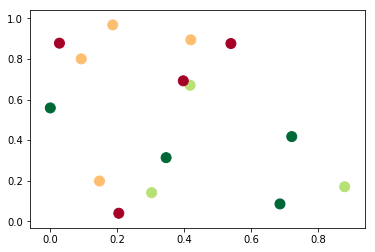

In [0]:
#how to show mouseover data points -- doesn't work

import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)

x = np.random.rand(15)
y = np.random.rand(15)
names = np.array(list("ABCDEFGHIJKLMNO"))
c = np.random.randint(1,5,size=15)

norm = plt.Normalize(1,4)
cmap = plt.cm.RdYlGn

fig,ax = plt.subplots()
sc = plt.scatter(x,y,c=c, s=100, cmap=cmap, norm=norm)

annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(ind):

    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}, {}".format(" ".join(list(map(str,ind["ind"]))), 
                           " ".join([names[n] for n in ind["ind"]]))
    annot.set_text(text)
    annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
    annot.get_bbox_patch().set_alpha(0.4)


def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()

In [0]:
# Import the necessaries libraries
import plotly.offline as pyo
import plotly.graph_objs as go
# Set notebook mode to work in offline
pyo.init_notebook_mode()
# Create traces
trace0 = go.Scatter(
    x=[1, 2, 3, 4],
    y=[10, 15, 13, 17]
)
trace1 = go.Scatter(
    x=[1, 2, 3, 4],
    y=[16, 5, 11, 9]
)
# Fill out data with our traces
data = [trace0, trace1]
# Plot it and save as basic-line.html
pyo.iplot(data, filename = 'basic-line')

Output hidden; open in https://colab.research.google.com to view.